In [5]:
import os
from PIL import Image
from glob import glob
        
for dirname, _, filenames in os.walk('/imagedata'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


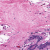

In [6]:
from PIL import Image

Image.open('imagedata/10253/0/10253_idx5_x1001_y1001_class0.png')

In [3]:
# get all of the file names
# use this to get cancer and benign images 
# then train test split
# Then transform to image array
# Then TRAIN!!!!
import keras
from tensorflow.keras.utils import load_img
import numpy as np
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

nonCancer = glob('imagedata/*/0/*.png')
cancerous = glob('imagedata/*/1/*.png')

training = []
labels = []
# Turn file names into images to train the net

for i in range(1, 1000):
    imageBenign = load_img(nonCancer[i])
    imageCancer = load_img(cancerous[i])
    imageBenign = imageBenign.resize([30, 30])
    imageCancer = imageCancer.resize([30, 30])
    benignArray = tf.keras.utils.img_to_array(imageBenign)
    cancerArray = tf.keras.utils.img_to_array(imageCancer)
    training.append(benignArray)
    labels.append(0)
    training.append(cancerArray)
    labels.append(1)
    


2023-03-08 16:11:51.384453: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# define the model according to keras tutorial 
# https://www.tensorflow.org/tutorials/images/cnn#create_the_convolutional_base

model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(np.array(training), np.array(labels), epochs=10)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

2023-03-08 16:11:57.074396: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'data_augmentation' is not defined

In [7]:
# Clean Script
from glob import glob
import tensorflow as tf
from tensorflow.keras.utils import load_img

# Collect paths to images based on label
nonCancerPaths = glob('imagedata/*/0/*.png')
cancerousPaths = glob('imagedata/*/1/*.png')

# Turn filepaths into image arrays to train a model
def paths_to_image(paths, label):
    images = []
    labels = []
    for path in paths:
        image = load_img(path)
        image = image.resize([50, 50])
        imgArray = tf.keras.utils.img_to_array(image)
        images.append(imgArray)
        labels.append(label)
    return (images, labels)
nonCancerImages = paths_to_image(nonCancerPaths, 0)
cancerImages = paths_to_image(cancerousPaths, 1)

In [8]:
# Train Test Split train = (images, labels)
from sklearn.model_selection import train_test_split
allImages = nonCancerImages[0] + cancerImages[0]
allLabels = nonCancerImages[1] + cancerImages[1]

x_train, x_test, y_train, y_test = train_test_split(allImages, allLabels, test_size=.5, stratify= allLabels, random_state = 10)



(142715, 50, 50, 3)
(142715,)
Epoch 1/10
4460/4460 [==============================] - 140s 31ms/step - loss: 0.4592 - accuracy: 0.8092 - val_loss: 0.4050 - val_accuracy: 0.8136
Epoch 2/10
4460/4460 [==============================] - 136s 31ms/step - loss: 0.3927 - accuracy: 0.8302 - val_loss: 0.4204 - val_accuracy: 0.8112
Epoch 3/10
4460/4460 [==============================] - 135s 30ms/step - loss: 0.3900 - accuracy: 0.8302 - val_loss: 0.3825 - val_accuracy: 0.8334
Epoch 4/10
4460/4460 [==============================] - 137s 31ms/step - loss: 0.3882 - accuracy: 0.8319 - val_loss: 0.3617 - val_accuracy: 0.8424
Epoch 5/10
4460/4460 [==============================] - 136s 31ms/step - loss: 0.3711 - accuracy: 0.8394 - val_loss: 0.3543 - val_accuracy: 0.8461
Epoch 6/10
4460/4460 [==============================] - 137s 31ms/step - loss: 0.3653 - accuracy: 0.8420 - val_loss: 0.3761 - val_accuracy: 0.8385
Epoch 7/10
4460/4460 [==============================] - 135s 30ms/step - loss: 0.3626 - 

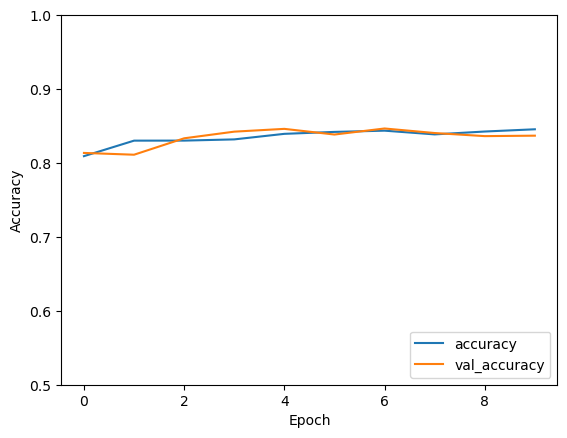

In [9]:
# define the model according to keras tutorial 
# https://www.tensorflow.org/tutorials/images/cnn#create_the_convolutional_base
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


print(np.array(x_train).shape)
print(np.array(y_train).shape)

#Add data augmentation to increase the robustness of the model
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(np.array(x_train), np.array(y_train), epochs=10, validation_data=(np.array(x_test), np.array(y_test)))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

4460/4460 - 35s - loss: 0.3744 - accuracy: 0.8369 - 35s/epoch - 8ms/step


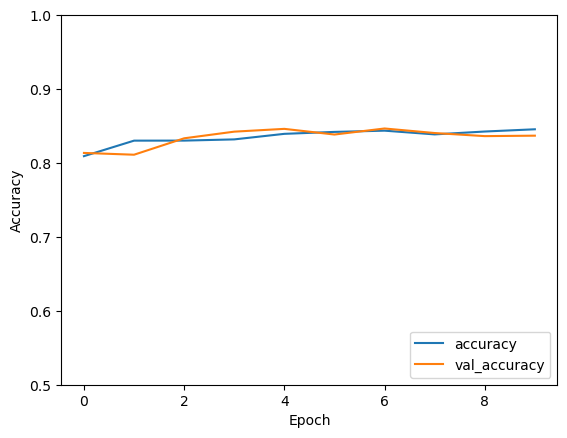

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(np.array(x_test),  np.array(y_test), verbose=2)

In [11]:
test_acc

0.8369197249412537

In [22]:
print(model.summary())
print(data_augmentation.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 50, 50, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)         

In [29]:
top_layer = model.layers
top_layer
# plt.imshow(top_layer.get_weights(), cmap='gray')

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [49]:
from keras.models import Model

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[:,act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
        
        

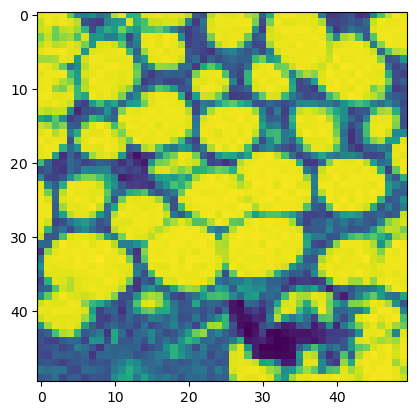

In [50]:
plt.imshow(x_train[10][:,:,1]);

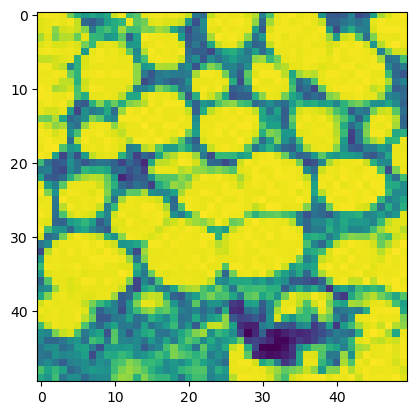

In [51]:
plt.imshow(x_train[10][:,:,0]);

1/1 [==============================] - 0s 22ms/step
[[ -0.94914174  -0.7077304  -56.49835    -55.32603    -56.67374
  -45.4491     -56.530846   -56.04439    -56.43767    -56.15431   ]]


IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed

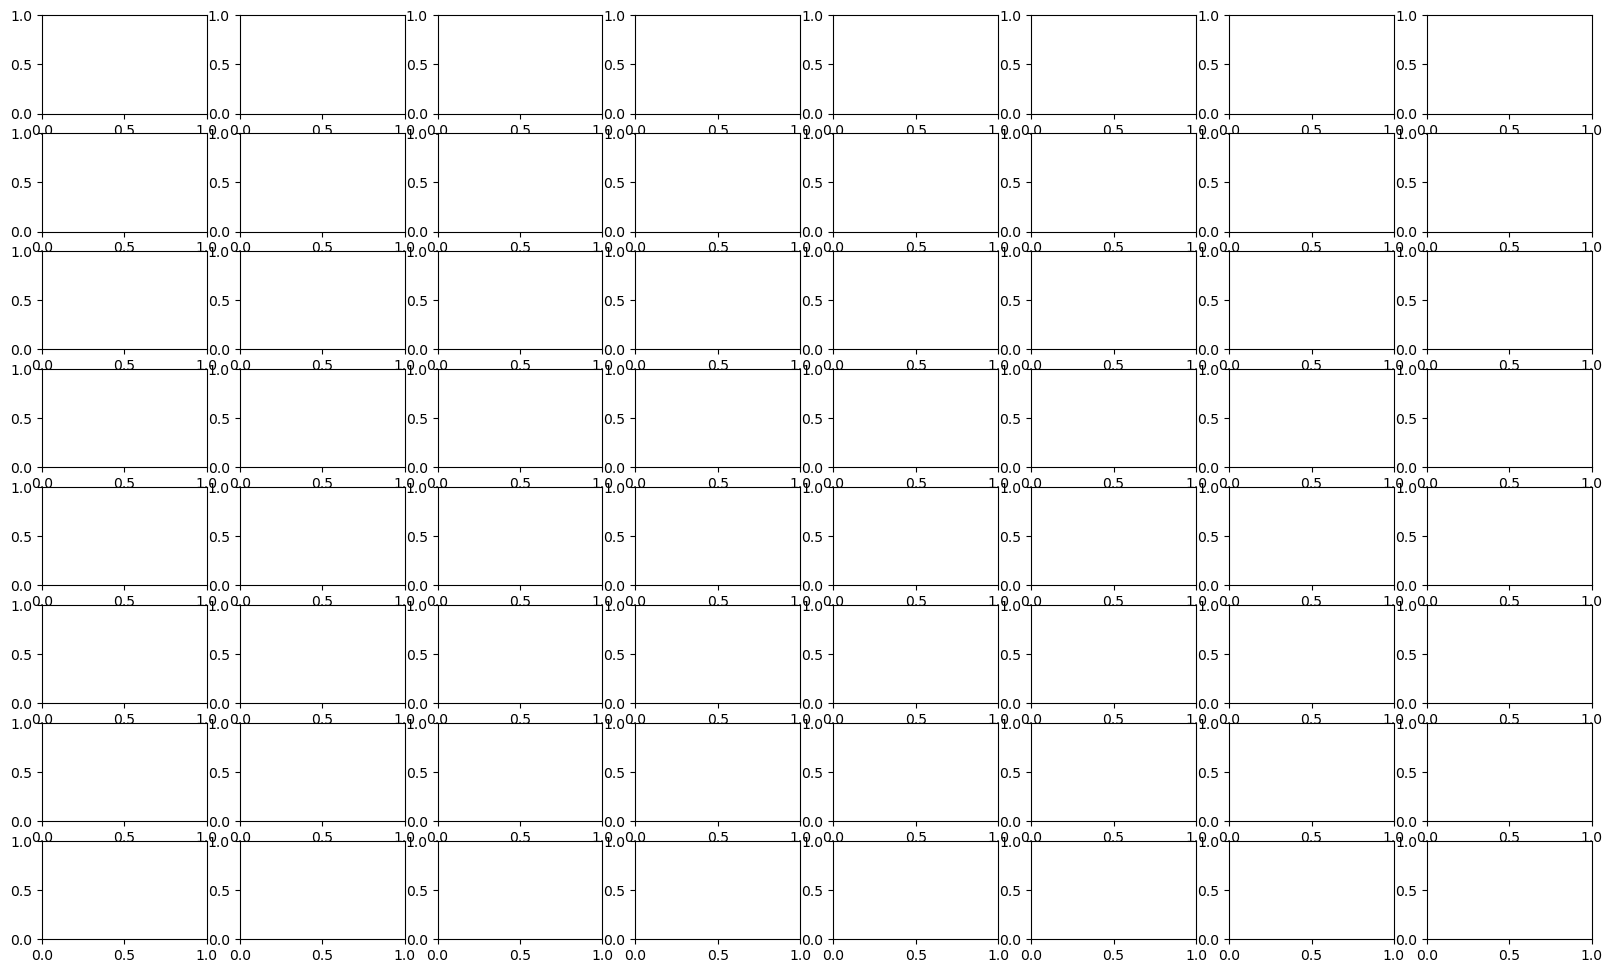

In [52]:
activations = model.predict(x_train[10].reshape(1,50,50,3))
print(activations)
display_activation(activations, 8, 8, 1)

In [ ]:
# 3 sets train, test, validation
# tune the parameters, model architecture
# first toggle learning parameters 
# Look at sensitivity and specificity at each epoch
# balance the classes
# How good is a doctor at classifying these images

# Assign a cost to each outcome
# Custom cost function value